# Import packages

In [2]:
# Write this line to import pandas & random package
import pandas

# Data loading

In [3]:
# load the dataset
data_frame = pandas.read_excel('./original_time_series_data.xlsx')

# Data info

7305 entries

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   S.NO        7305 non-null   int64         
 1   Date        7305 non-null   datetime64[ns]
 2   DBI_8.30    7274 non-null   object        
 3   WBI_8.30    7272 non-null   object        
 4   DBII_14.20  7272 non-null   object        
 5   WBII_14.20  7272 non-null   object        
 6   Max Temp    7235 non-null   object        
 7   Min Temp    7101 non-null   object        
 8   RHI_8.30    7269 non-null   object        
 9   RHII_14.20  7264 non-null   object        
 10  WS          7134 non-null   object        
 11  BSS         7223 non-null   object        
 12  Rain        7298 non-null   object        
 13  Evp         6932 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 799.1+ KB


In [5]:
# check the number of missing values
data_frame.isna().sum()

S.NO            0
Date            0
DBI_8.30       31
WBI_8.30       33
DBII_14.20     33
WBII_14.20     33
Max Temp       70
Min Temp      204
RHI_8.30       36
RHII_14.20     41
WS            171
BSS            82
Rain            7
Evp           373
dtype: int64

# Data cleaning

In [6]:
# loop through the columns
for column in data_frame.columns:
    # skip the Date and S.NO columns
    if column in ['Date', 'S.NO']:
        print('Skipping', column)
        continue
    # check if the column is of type object
    if data_frame[column].dtype == 'object':
        # convert the column to numeric
        data_frame[column] = pandas.to_numeric(data_frame[column], errors='coerce')
        # here we are using coerce to convert the non numeric values to NaN
        # coerce means to force something to happen
        # so we are forcing the non numeric values to be converted to NaN
        # so that we can count them

data_frame.isna().sum()

Skipping S.NO
Skipping Date


S.NO            0
Date            0
DBI_8.30       34
WBI_8.30       37
DBII_14.20     45
WBII_14.20     42
Max Temp       72
Min Temp      219
RHI_8.30       43
RHII_14.20     48
WS            221
BSS           187
Rain            8
Evp           473
dtype: int64

In [7]:
# show all the rows where the value of the column is NaN
for column in data_frame.columns:
    if column in ['Date', 'S.NO']:
        continue
    print('Missing values in', column, ':', data_frame[data_frame[column].isna()].shape[0])
    if data_frame[data_frame[column].isna()].shape[0] > 0:
        print(data_frame[data_frame[column].isna()])
        print()

Missing values in DBI_8.30 : 34
      S.NO       Date  DBI_8.30  WBI_8.30  DBII_14.20  WBII_14.20  Max Temp  \
1005     2 1978-10-02       NaN       8.2        17.8        11.0      17.6   
2657    11 1973-04-11       NaN       NaN         NaN         NaN       NaN   
2893     3 1973-12-03       NaN       NaN         NaN         NaN       NaN   
2894     4 1973-12-04       NaN       NaN         NaN         NaN       NaN   
2895     5 1973-12-05       NaN       NaN         NaN         NaN       NaN   
2896     6 1973-12-06       NaN       NaN         NaN         NaN       NaN   
2897     7 1973-12-07       NaN       NaN         NaN         NaN       NaN   
2898     8 1973-12-08       NaN       NaN         NaN         NaN       NaN   
2899     9 1973-12-09       NaN       NaN         NaN         NaN       NaN   
2900    10 1973-12-10       NaN       NaN         NaN         NaN       NaN   
2901    11 1973-12-11       NaN       NaN         NaN         NaN       NaN   
2902    12 1973-12-1

In [8]:
# set NaN values to mean of the column
data_frame = data_frame.fillna(data_frame.mean())

# check if there are any NaN values
data_frame.isna().sum()

S.NO          0
Date          0
DBI_8.30      0
WBI_8.30      0
DBII_14.20    0
WBII_14.20    0
Max Temp      0
Min Temp      0
RHI_8.30      0
RHII_14.20    0
WS            0
BSS           0
Rain          0
Evp           0
dtype: int64

In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   S.NO        7305 non-null   int64         
 1   Date        7305 non-null   datetime64[ns]
 2   DBI_8.30    7305 non-null   float64       
 3   WBI_8.30    7305 non-null   float64       
 4   DBII_14.20  7305 non-null   float64       
 5   WBII_14.20  7305 non-null   float64       
 6   Max Temp    7305 non-null   float64       
 7   Min Temp    7305 non-null   float64       
 8   RHI_8.30    7305 non-null   float64       
 9   RHII_14.20  7305 non-null   float64       
 10  WS          7305 non-null   float64       
 11  BSS         7305 non-null   float64       
 12  Rain        7305 non-null   float64       
 13  Evp         7305 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 799.1 KB


In [10]:
data_frame

S.NO       Date  DBI_8.30  WBI_8.30  DBII_14.20  WBII_14.20  Max Temp  \
0        1 1980-01-01      52.0       8.2        18.6        11.4      22.8   
1        2 1980-01-02      12.2       4.0        20.4        12.0      20.8   
2        3 1980-01-03      11.3       3.4        19.6        10.4      21.8   
3        4 1980-01-04      13.4       4.6        18.4        10.4      20.7   
4        5 1980-01-05      12.0       4.6        19.2        11.4      19.4   
...    ...        ...       ...       ...         ...         ...       ...   
7300    27 1961-12-27       8.8       7.6        15.6        14.5      18.6   
7301    28 1961-12-28       7.2       4.6        15.0         6.7      17.1   
7302    29 1961-12-29       9.3       8.9        17.2        13.9      16.8   
7303    30 1961-12-30      12.1      12.0        16.5        13.9      18.9   
7304    31 1961-12-31      11.0      10.4        18.2        13.9      17.7   

      Min Temp  RHI_8.30  RHII_14.20    WS   BSS  Rain  Evp  
0          8.0      52.0        41.0   2.9   9.6   0.0  5.1  
1          7.9      21.0        36.0   1.3   9.7   0.0  4.1  
2          8.9      18.0        29.0   1.4  10.0   0.0  4.8  
3          7.9      19.0        35.0   1.4   9.6   0.0  3.4  
4          7.9      27.0        38.0   1.6   9.7   0.0  6.6  
...        ...       ...         ...   ...   ...   ...  ...  
7300       5.7      84.0        89.0   7.6   9.8   0.0  1.7  
7301       6.3      68.0        26.0  11.6  10.3   0.0  3.9  
7302       4.9      96.0        70.0  10.0   9.4   0.0  4.9  
7303      10.2      99.0        77.0  10.0   9.0   0.0  1.8  
7304       8.8      94.0        63.0   6.0   0.6   0.0  1.2  

[7305 rows x 14 columns]

# Transformation

In [11]:
data_frame.head()

S.NO       Date  DBI_8.30  WBI_8.30  DBII_14.20  WBII_14.20  Max Temp  \
0     1 1980-01-01      52.0       8.2        18.6        11.4      22.8   
1     2 1980-01-02      12.2       4.0        20.4        12.0      20.8   
2     3 1980-01-03      11.3       3.4        19.6        10.4      21.8   
3     4 1980-01-04      13.4       4.6        18.4        10.4      20.7   
4     5 1980-01-05      12.0       4.6        19.2        11.4      19.4   

   Min Temp  RHI_8.30  RHII_14.20   WS   BSS  Rain  Evp  
0       8.0      52.0        41.0  2.9   9.6   0.0  5.1  
1       7.9      21.0        36.0  1.3   9.7   0.0  4.1  
2       8.9      18.0        29.0  1.4  10.0   0.0  4.8  
3       7.9      19.0        35.0  1.4   9.6   0.0  3.4  
4       7.9      27.0        38.0  1.6   9.7   0.0  6.6

In [12]:
# remove space from column name and lowercase all column names
data_frame.columns = data_frame.columns.str.strip().str.lower()
data_frame.head()

s.no       date  dbi_8.30  wbi_8.30  dbii_14.20  wbii_14.20  max temp  \
0     1 1980-01-01      52.0       8.2        18.6        11.4      22.8   
1     2 1980-01-02      12.2       4.0        20.4        12.0      20.8   
2     3 1980-01-03      11.3       3.4        19.6        10.4      21.8   
3     4 1980-01-04      13.4       4.6        18.4        10.4      20.7   
4     5 1980-01-05      12.0       4.6        19.2        11.4      19.4   

   min temp  rhi_8.30  rhii_14.20   ws   bss  rain  evp  
0       8.0      52.0        41.0  2.9   9.6   0.0  5.1  
1       7.9      21.0        36.0  1.3   9.7   0.0  4.1  
2       8.9      18.0        29.0  1.4  10.0   0.0  4.8  
3       7.9      19.0        35.0  1.4   9.6   0.0  3.4  
4       7.9      27.0        38.0  1.6   9.7   0.0  6.6

In [13]:
# remove space from column name in between words
data_frame.columns = data_frame.columns.str.replace(' ', '_')
data_frame.head()

s.no       date  dbi_8.30  wbi_8.30  dbii_14.20  wbii_14.20  max_temp  \
0     1 1980-01-01      52.0       8.2        18.6        11.4      22.8   
1     2 1980-01-02      12.2       4.0        20.4        12.0      20.8   
2     3 1980-01-03      11.3       3.4        19.6        10.4      21.8   
3     4 1980-01-04      13.4       4.6        18.4        10.4      20.7   
4     5 1980-01-05      12.0       4.6        19.2        11.4      19.4   

   min_temp  rhi_8.30  rhii_14.20   ws   bss  rain  evp  
0       8.0      52.0        41.0  2.9   9.6   0.0  5.1  
1       7.9      21.0        36.0  1.3   9.7   0.0  4.1  
2       8.9      18.0        29.0  1.4  10.0   0.0  4.8  
3       7.9      19.0        35.0  1.4   9.6   0.0  3.4  
4       7.9      27.0        38.0  1.6   9.7   0.0  6.6

In [14]:
# convert date column to datetime format
data_frame['date'] = pandas.to_datetime(data_frame['date'])
data_frame.head()

s.no       date  dbi_8.30  wbi_8.30  dbii_14.20  wbii_14.20  max_temp  \
0     1 1980-01-01      52.0       8.2        18.6        11.4      22.8   
1     2 1980-01-02      12.2       4.0        20.4        12.0      20.8   
2     3 1980-01-03      11.3       3.4        19.6        10.4      21.8   
3     4 1980-01-04      13.4       4.6        18.4        10.4      20.7   
4     5 1980-01-05      12.0       4.6        19.2        11.4      19.4   

   min_temp  rhi_8.30  rhii_14.20   ws   bss  rain  evp  
0       8.0      52.0        41.0  2.9   9.6   0.0  5.1  
1       7.9      21.0        36.0  1.3   9.7   0.0  4.1  
2       8.9      18.0        29.0  1.4  10.0   0.0  4.8  
3       7.9      19.0        35.0  1.4   9.6   0.0  3.4  
4       7.9      27.0        38.0  1.6   9.7   0.0  6.6

In [15]:
# get month and year from date column and add them as new columns
data_frame['month'] = data_frame['date'].dt.month
data_frame['year'] = data_frame['date'].dt.year
data_frame.head()

s.no       date  dbi_8.30  wbi_8.30  dbii_14.20  wbii_14.20  max_temp  \
0     1 1980-01-01      52.0       8.2        18.6        11.4      22.8   
1     2 1980-01-02      12.2       4.0        20.4        12.0      20.8   
2     3 1980-01-03      11.3       3.4        19.6        10.4      21.8   
3     4 1980-01-04      13.4       4.6        18.4        10.4      20.7   
4     5 1980-01-05      12.0       4.6        19.2        11.4      19.4   

   min_temp  rhi_8.30  rhii_14.20   ws   bss  rain  evp  month  year  
0       8.0      52.0        41.0  2.9   9.6   0.0  5.1      1  1980  
1       7.9      21.0        36.0  1.3   9.7   0.0  4.1      1  1980  
2       8.9      18.0        29.0  1.4  10.0   0.0  4.8      1  1980  
3       7.9      19.0        35.0  1.4   9.6   0.0  3.4      1  1980  
4       7.9      27.0        38.0  1.6   9.7   0.0  6.6      1  1980

In [16]:
# save the cleaned data to a new file
data_frame.to_excel('./cleaned_time_series_data.xlsx', index=False)

In [17]:
# drop date & s.no columns
data_frame.drop('date', axis=1, inplace=True)
data_frame.drop('s.no', axis=1, inplace=True)
data_frame.head()

dbi_8.30  wbi_8.30  dbii_14.20  wbii_14.20  max_temp  min_temp  rhi_8.30  \
0      52.0       8.2        18.6        11.4      22.8       8.0      52.0   
1      12.2       4.0        20.4        12.0      20.8       7.9      21.0   
2      11.3       3.4        19.6        10.4      21.8       8.9      18.0   
3      13.4       4.6        18.4        10.4      20.7       7.9      19.0   
4      12.0       4.6        19.2        11.4      19.4       7.9      27.0   

   rhii_14.20   ws   bss  rain  evp  month  year  
0        41.0  2.9   9.6   0.0  5.1      1  1980  
1        36.0  1.3   9.7   0.0  4.1      1  1980  
2        29.0  1.4  10.0   0.0  4.8      1  1980  
3        35.0  1.4   9.6   0.0  3.4      1  1980  
4        38.0  1.6   9.7   0.0  6.6      1  1980

# Visualization

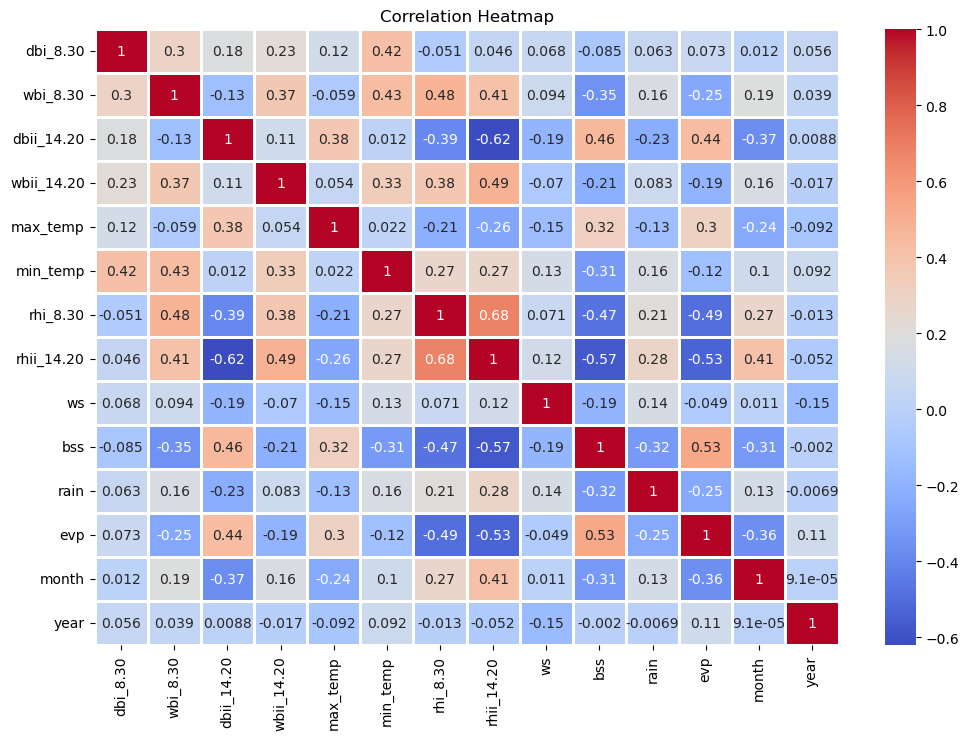

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_frame.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

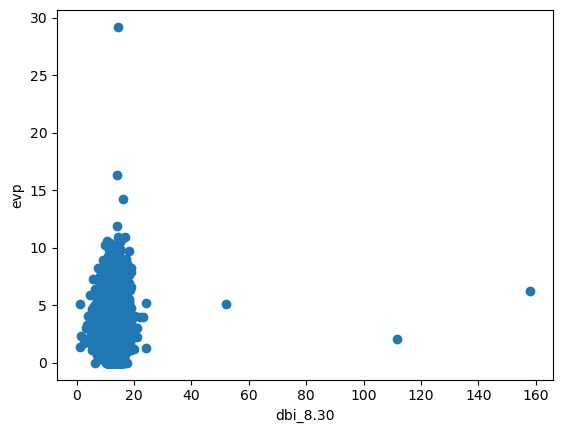

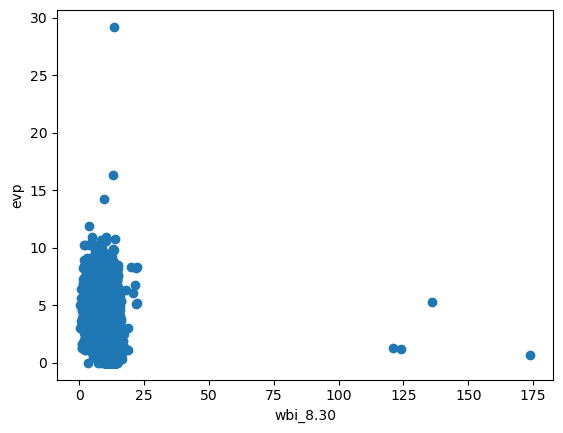

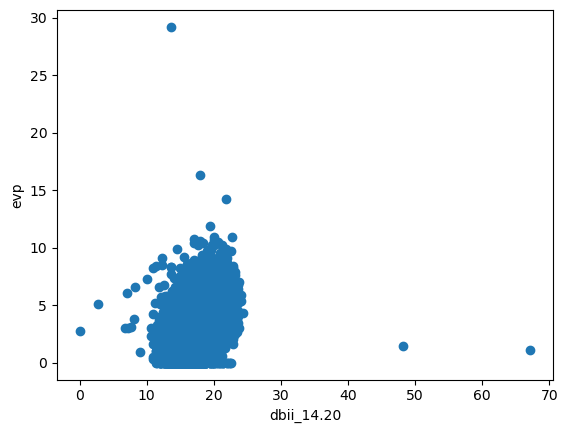

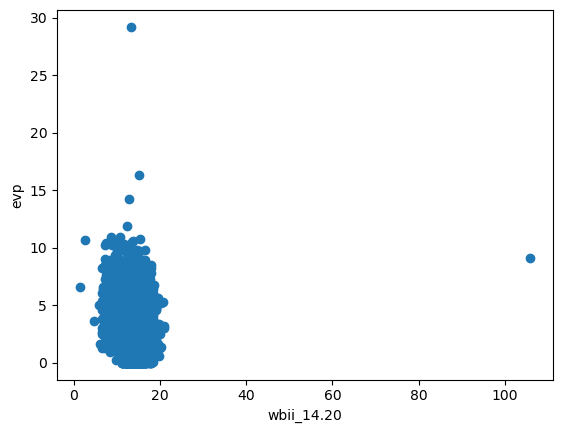

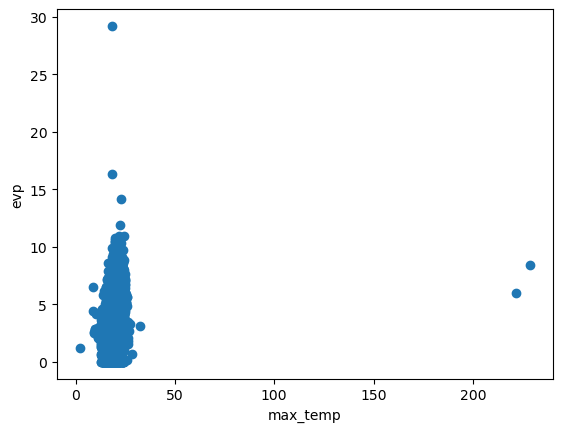

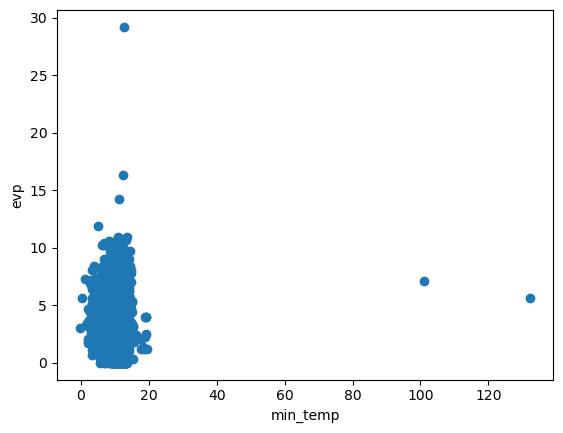

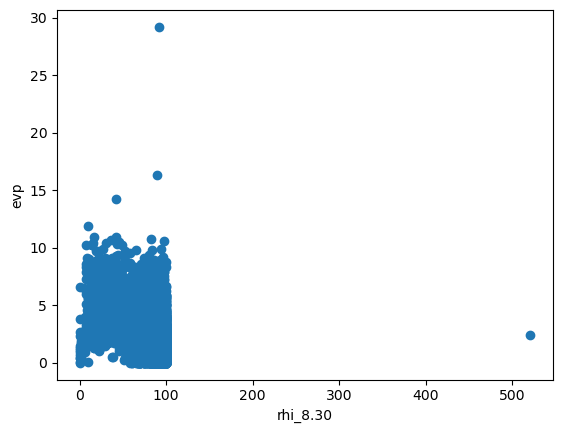

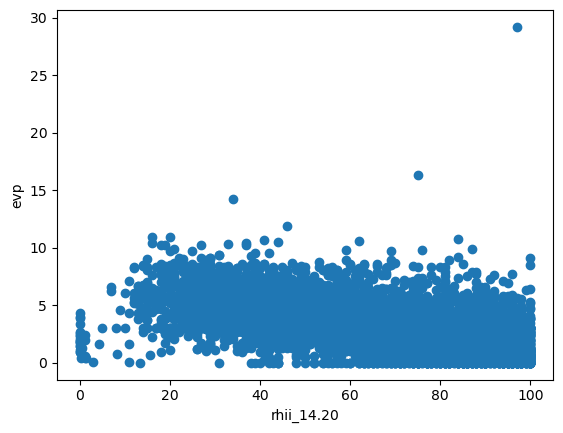

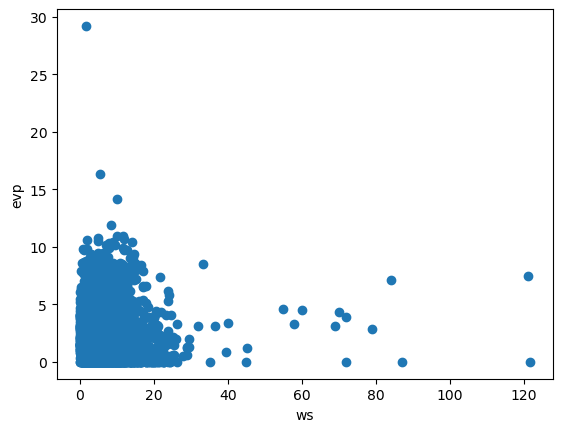

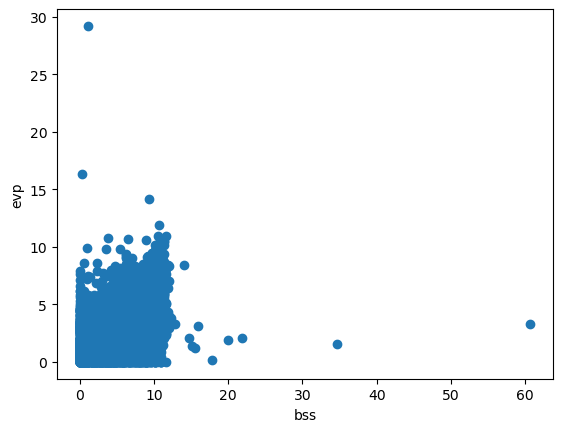

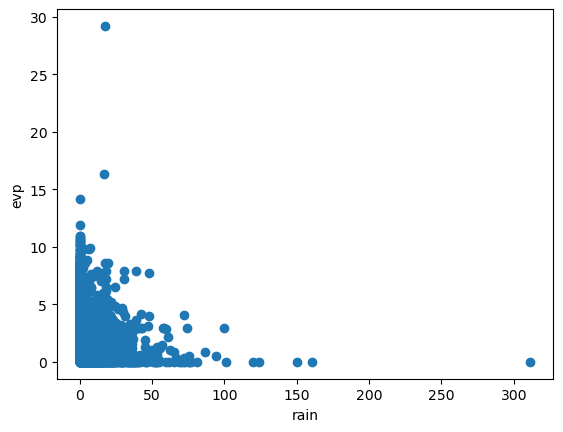

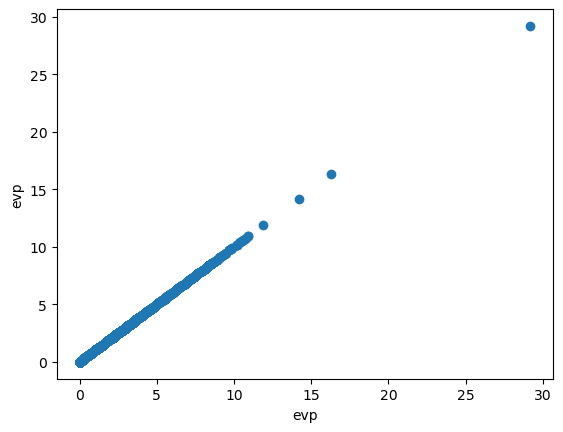

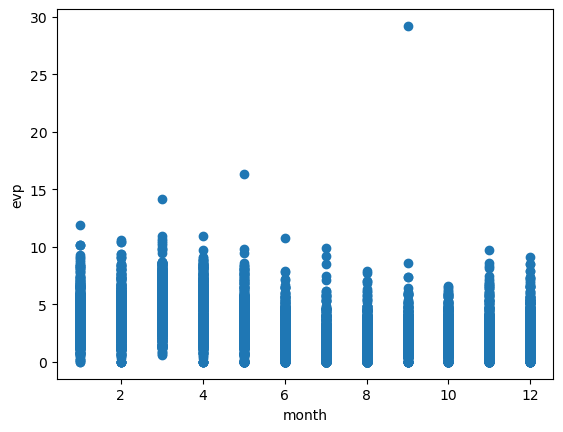

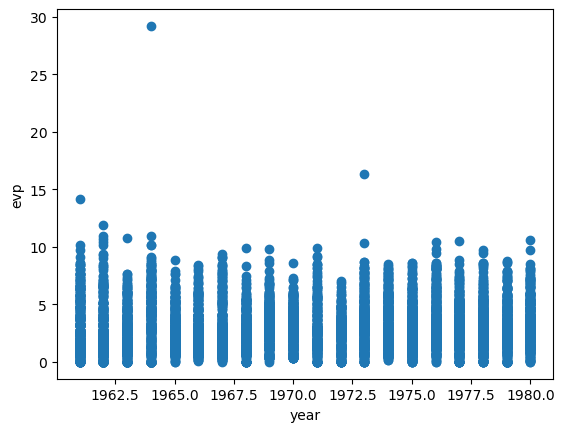

In [19]:
# plot scatter plot for each column with respect to the target column

for column in data_frame.columns:
    if column == 'target':
        continue
    # plt.figure(figsize=(18, 6))
    plt.scatter(data_frame[column], data_frame['evp'])
    plt.xlabel(column)
    plt.autoscale()
    plt.ylabel('evp')
    plt.show()

In [20]:
# show month wise data
data_frame.groupby('month').mean()

mean_monthly_data = data_frame.groupby('month').mean()

In [21]:
data_frame.groupby('year').mean()

mean_yearly_data = data_frame.groupby('year').mean()

## line chart mean monthly data

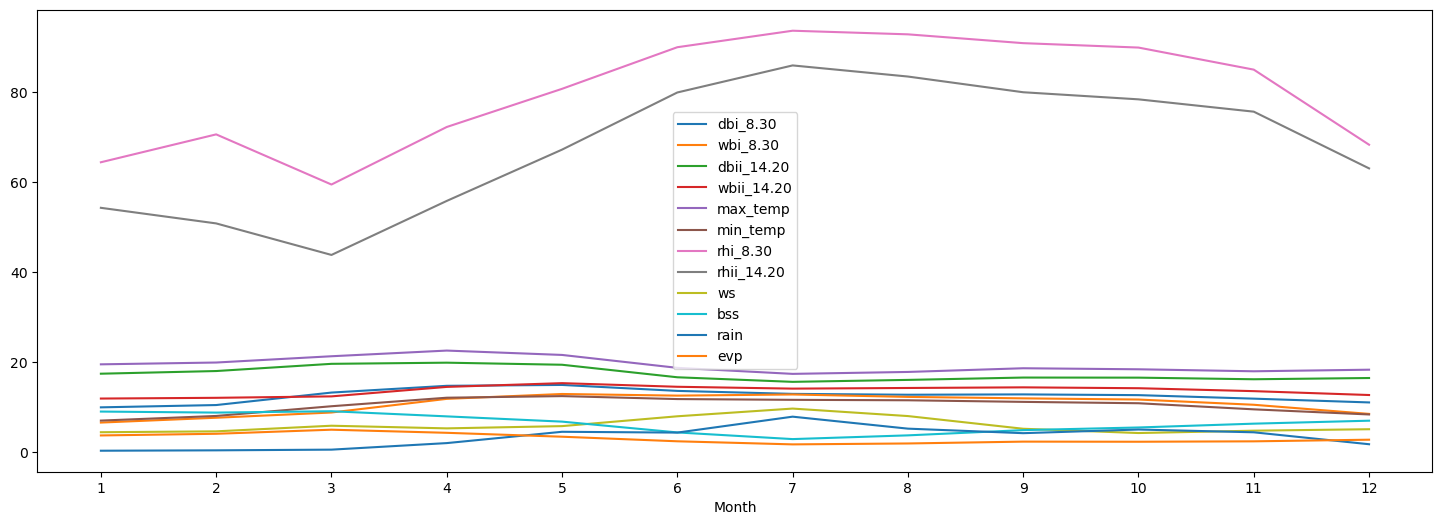

In [22]:
# line chart mean monthly data

plt.subplots(figsize=(18, 6))

for column in mean_monthly_data.columns:
    if column in ['year', 'month']:
        continue
    plt.xlabel('Month')
    plt.xticks(mean_monthly_data.index)
    plt.plot(mean_monthly_data[column], label=column)
    plt.legend()

## line chart mean yearly data

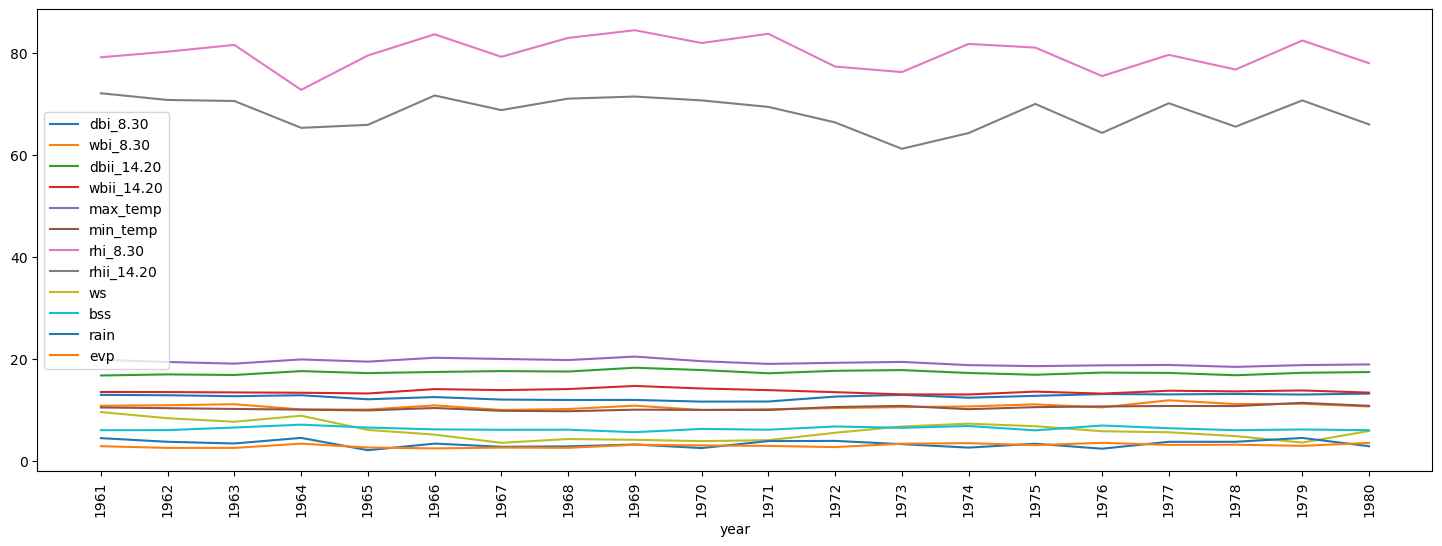

In [23]:
# line chart mean yearly data

plt.subplots(figsize=(18, 6))

for column in mean_yearly_data.columns:
    if column in ['year', 'month']:
        continue
    plt.xlabel('year')
    plt.xticks(mean_yearly_data.index, rotation=90)
    plt.plot(mean_yearly_data[column], label=column)
    plt.legend()

## Each year and then its month wise data and plot the average monthly data for each column

Year: 1980


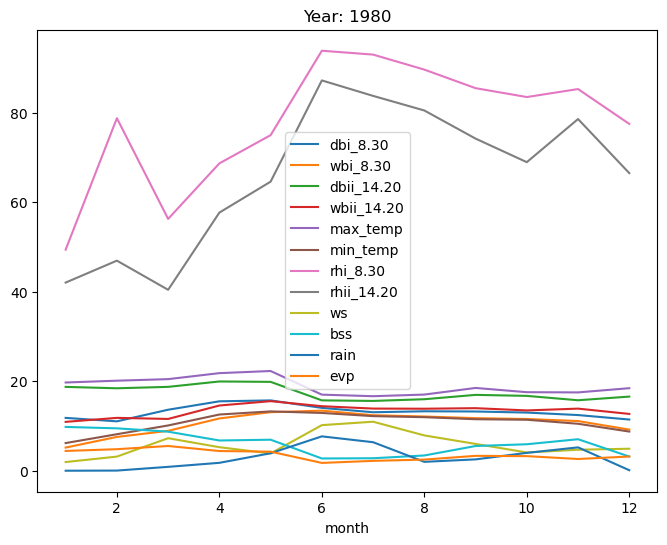

Year: 1979


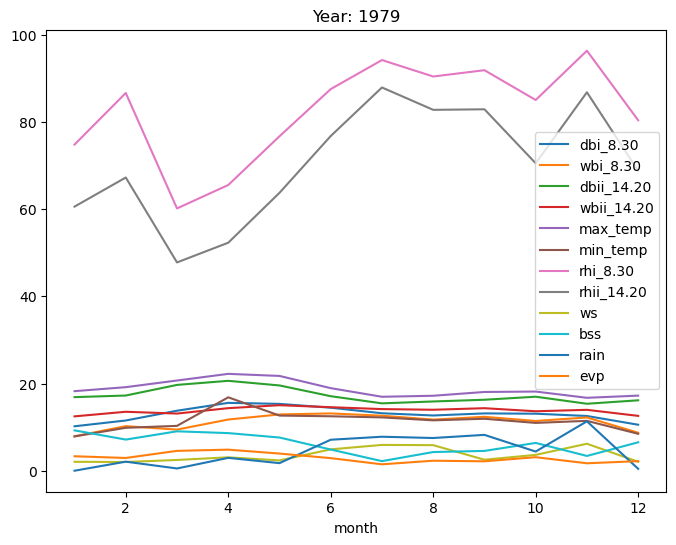

Year: 1978


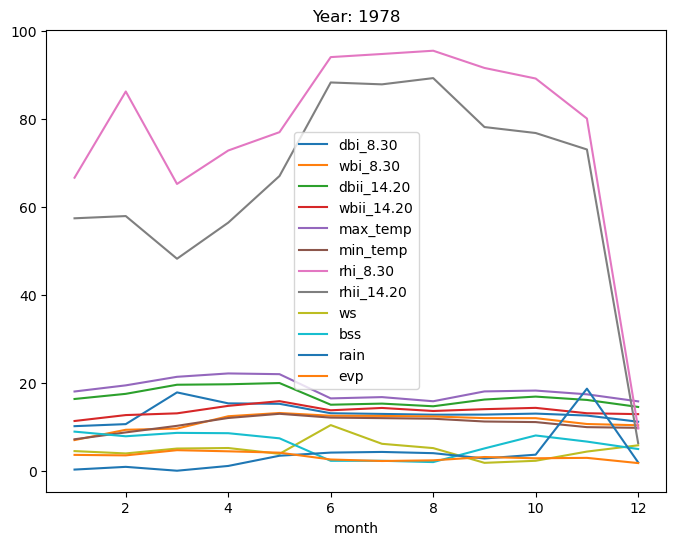

Year: 1977


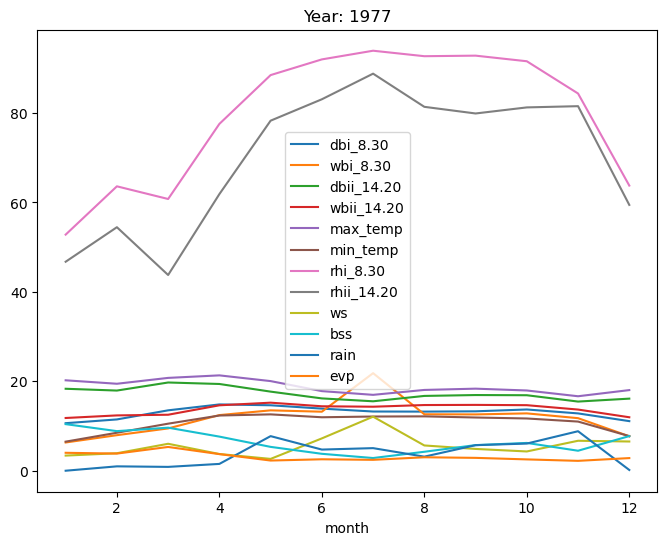

Year: 1976


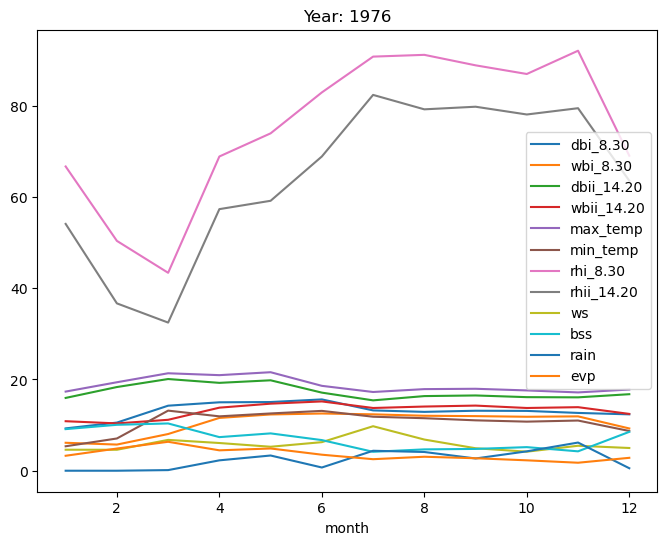

Year: 1975


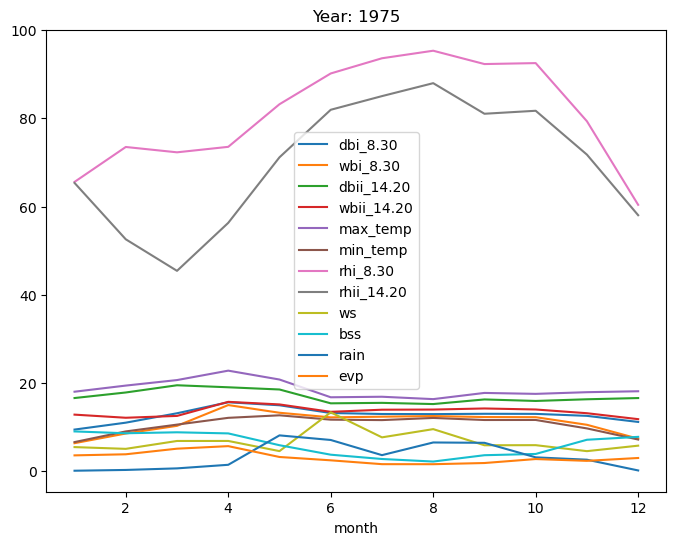

Year: 1974


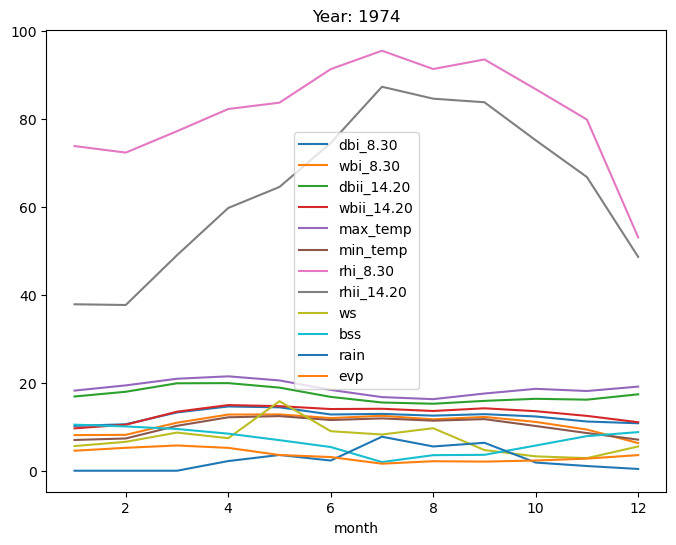

Year: 1973


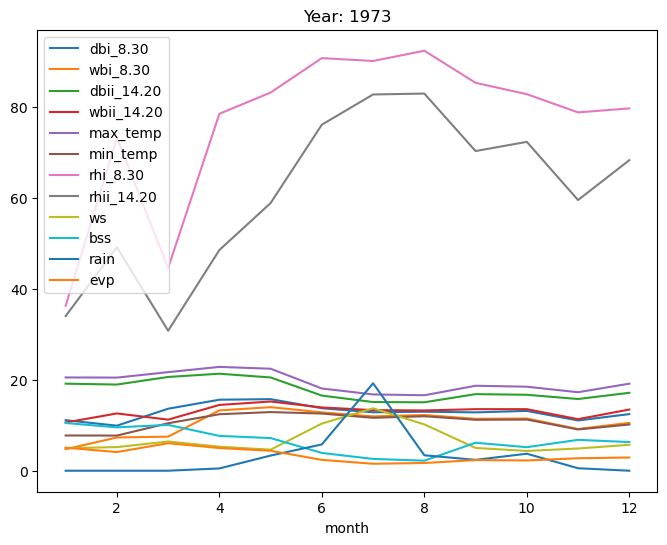

Year: 1972


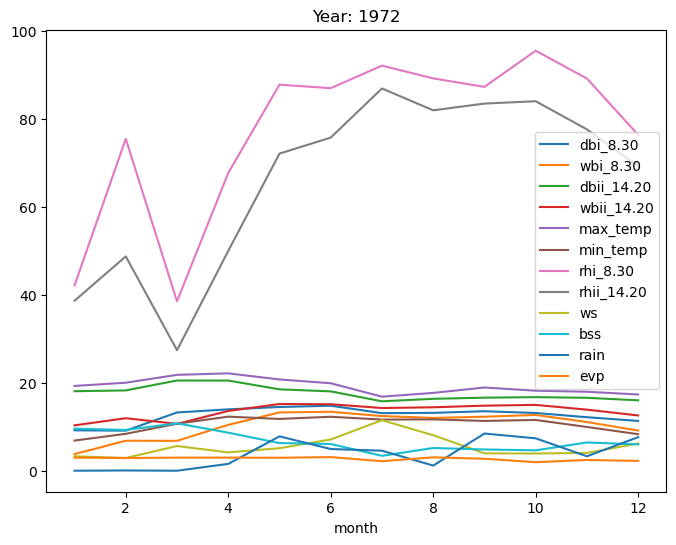

Year: 1971


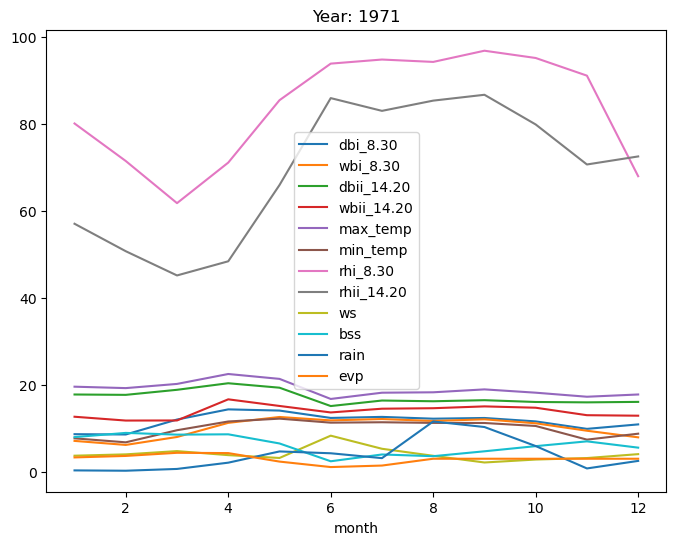

Year: 1970


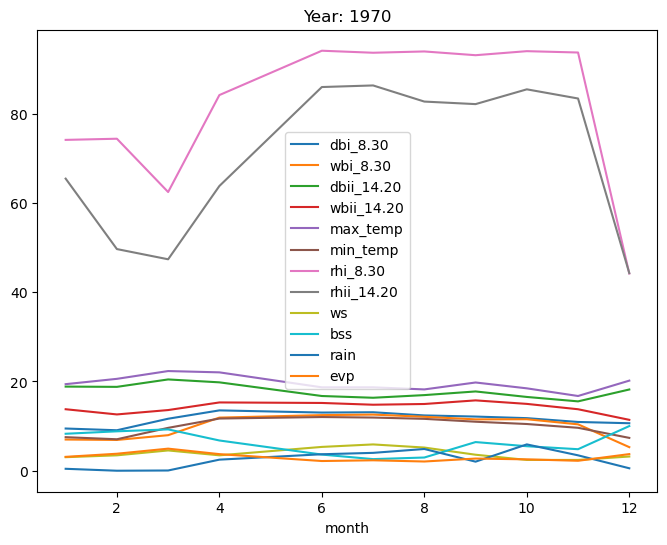

Year: 1969


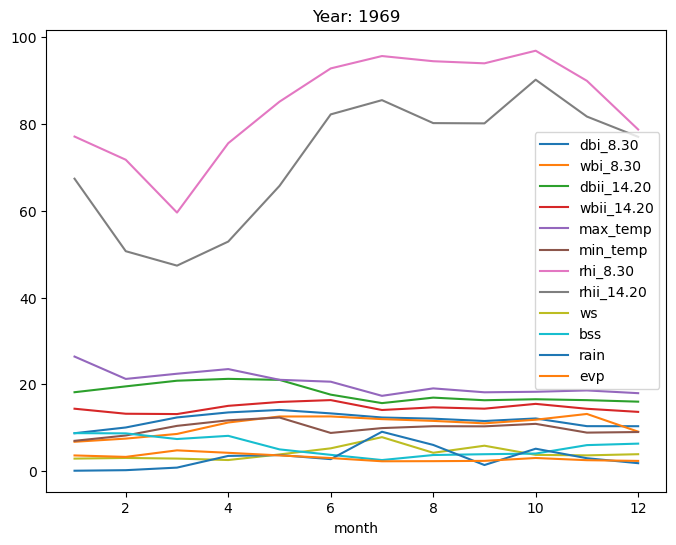

Year: 1968


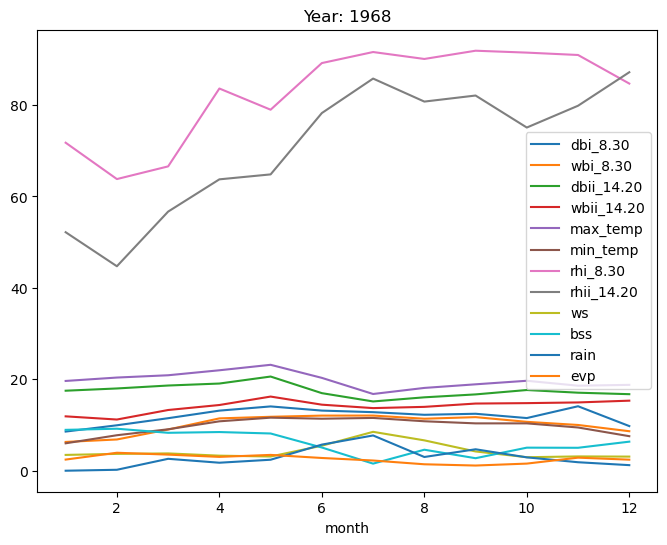

Year: 1967


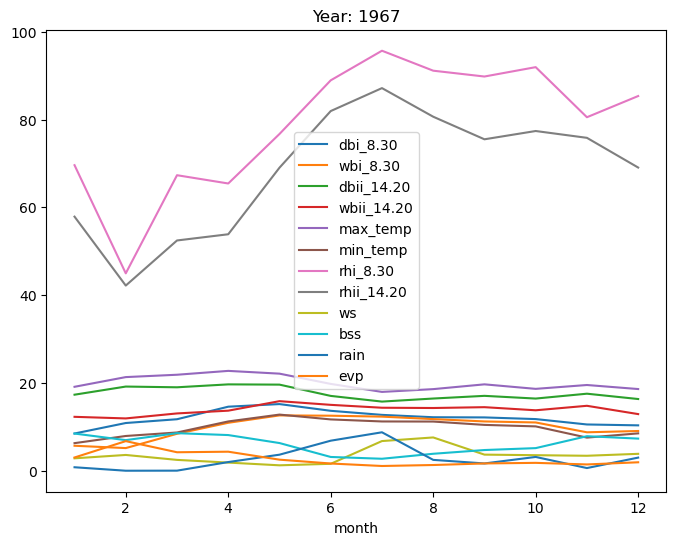

Year: 1966


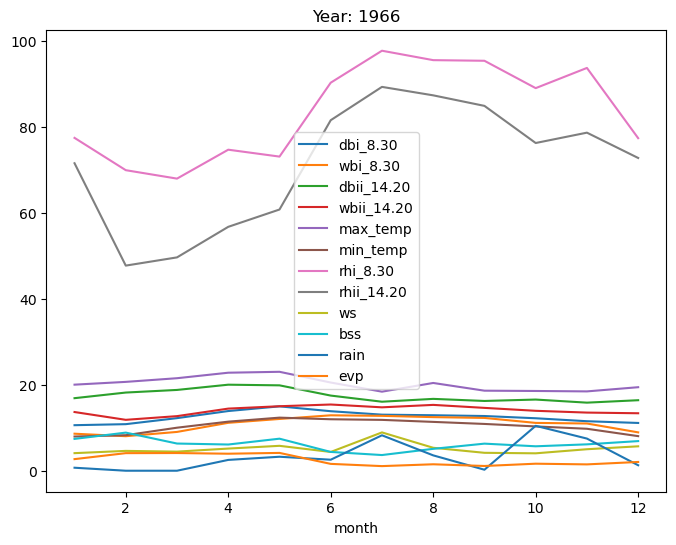

Year: 1965


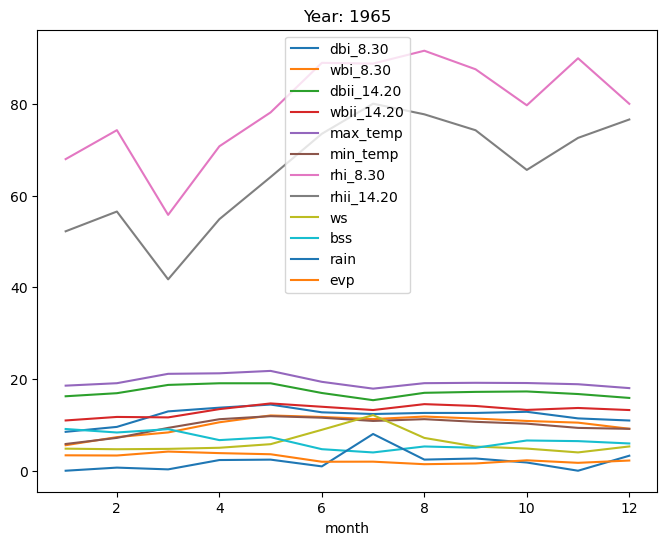

Year: 1964


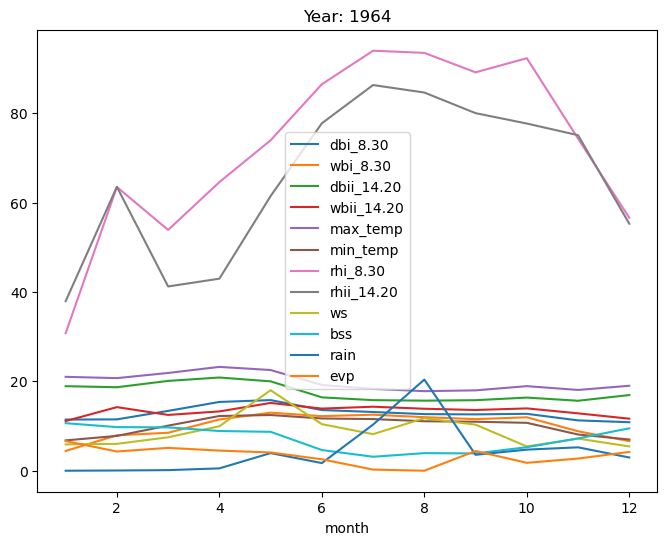

Year: 1963


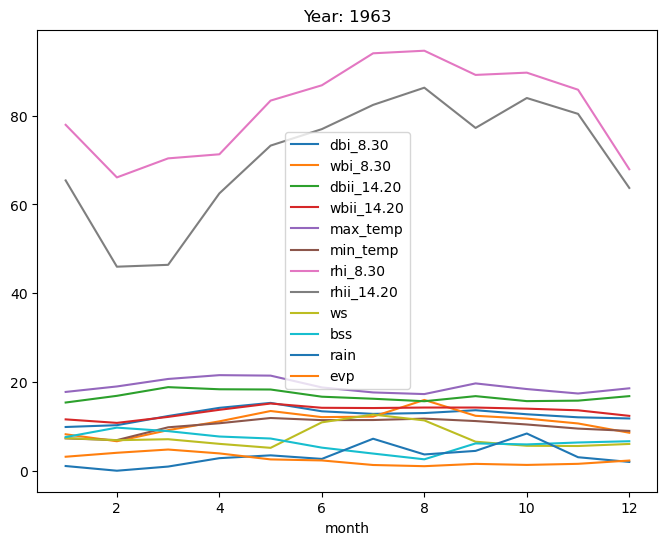

Year: 1962


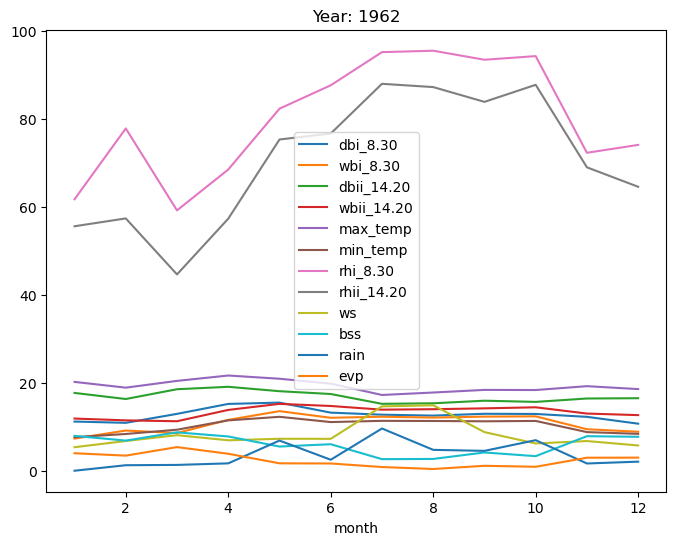

Year: 1961


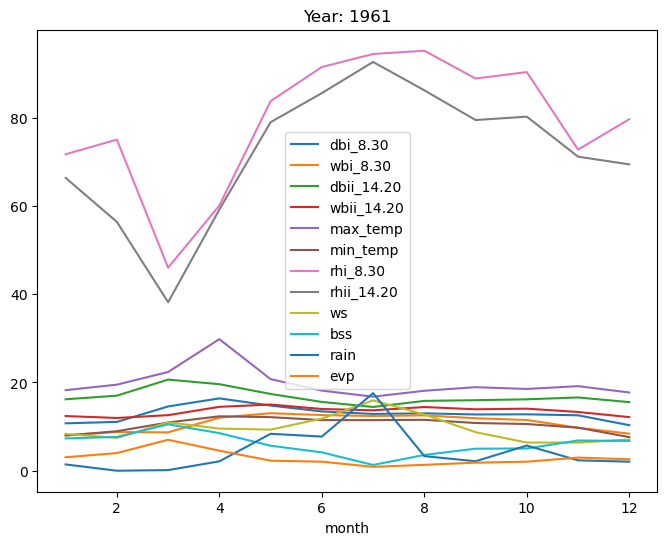

In [24]:
for year in data_frame['year'].unique():
    print('Year:', year)
    # remove year column
    _data_frame = data_frame.drop(columns=['year'])
    _data_frame[data_frame['year'] == year].groupby('month').mean().plot(figsize=(4*2, 3*2))
    plt.title('Year: ' + str(year))
    plt.show()

## For all the years and their month wise data for each column mean of each month

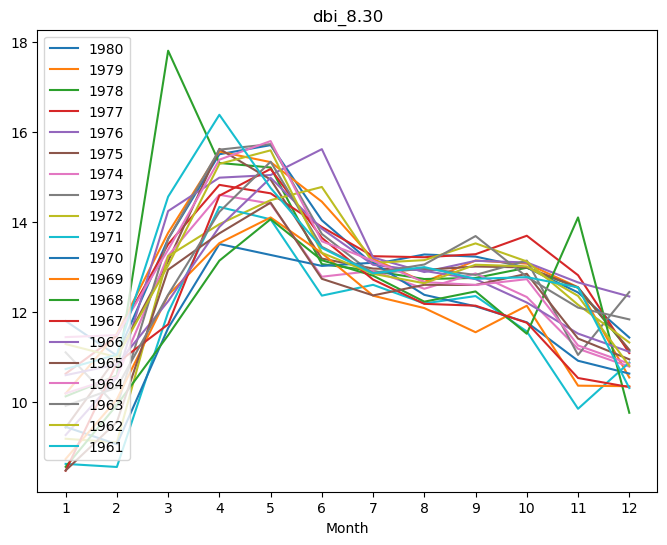

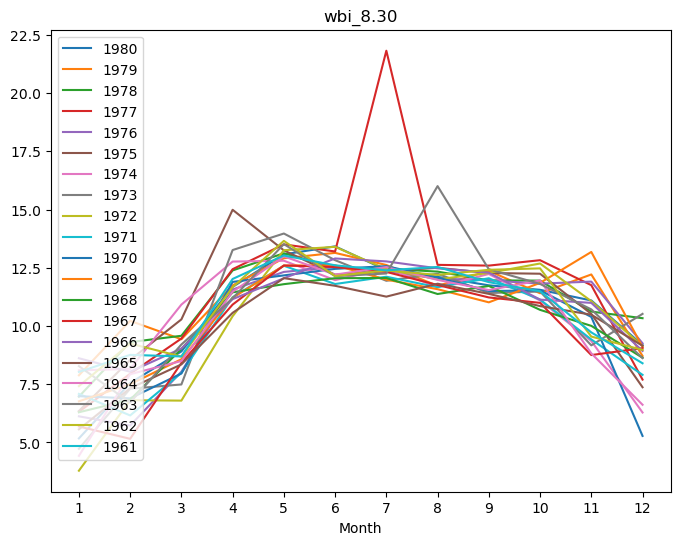

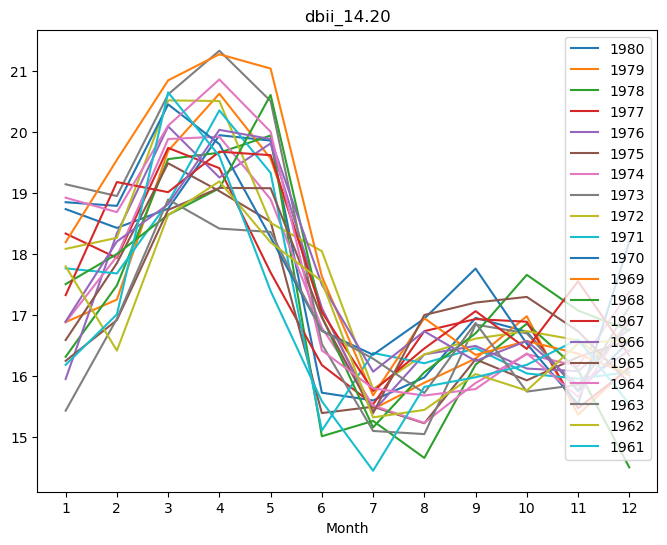

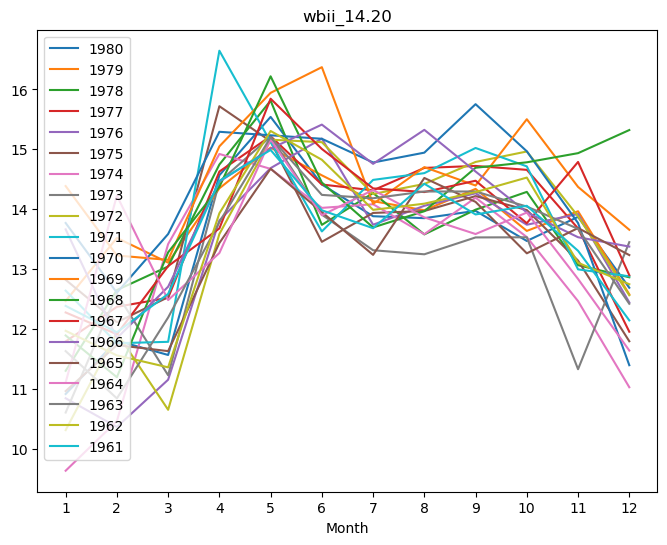

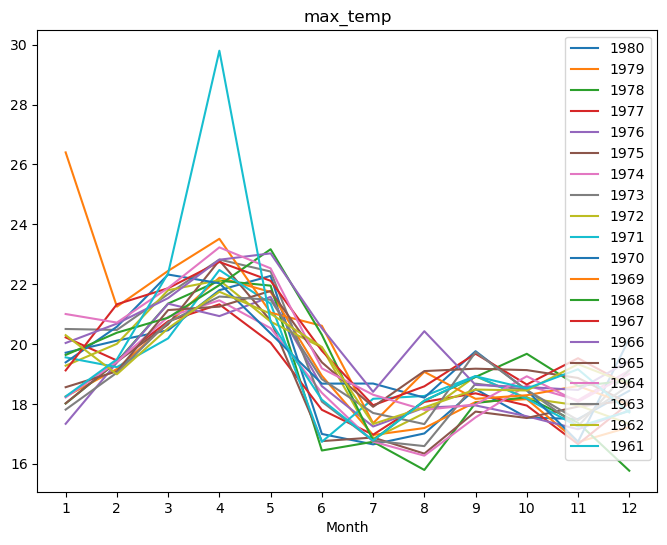

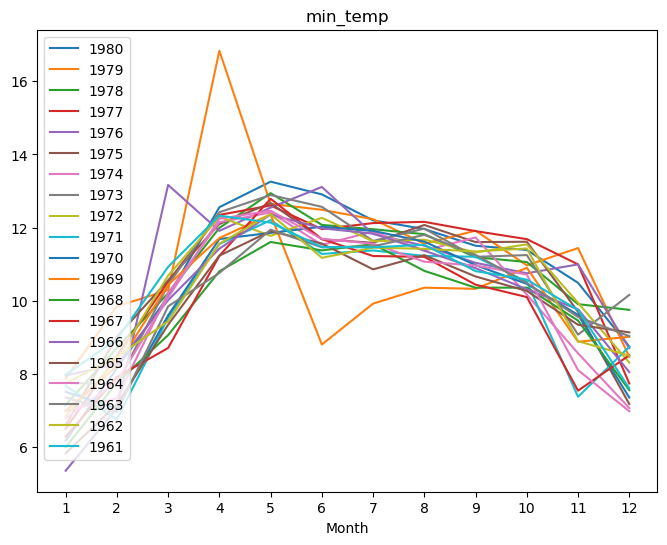

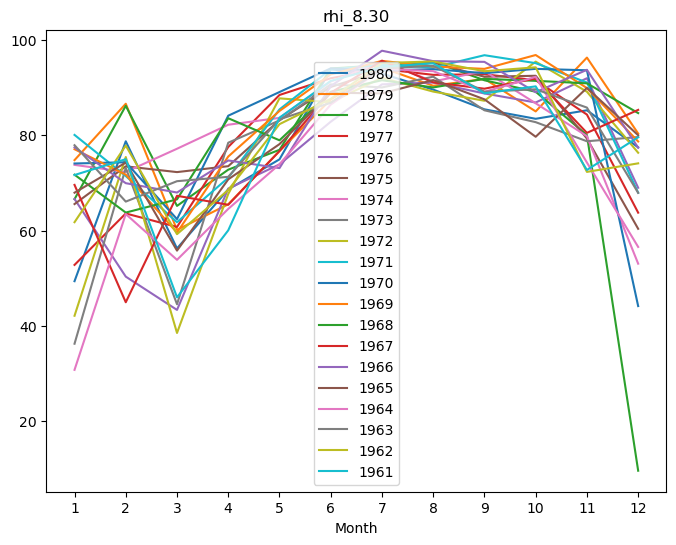

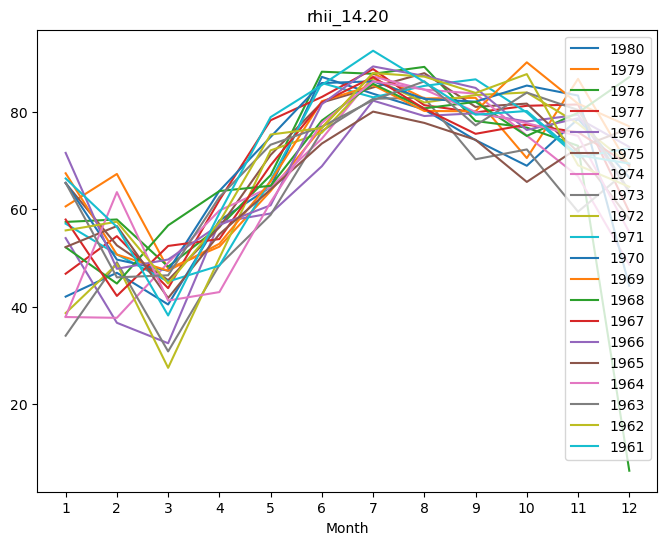

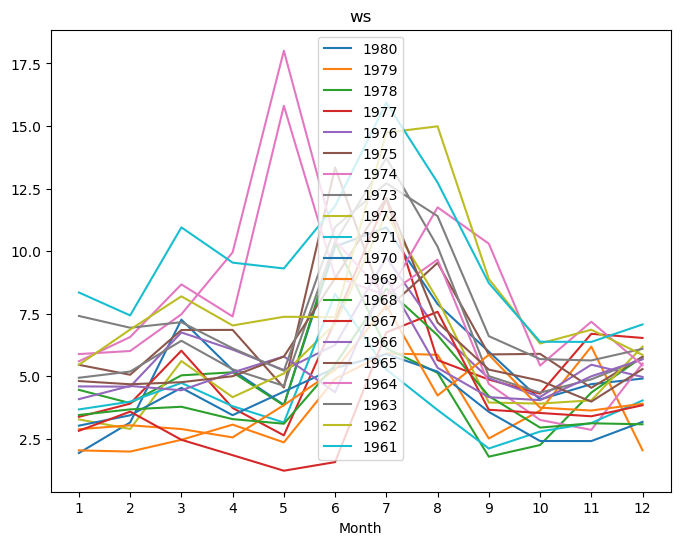

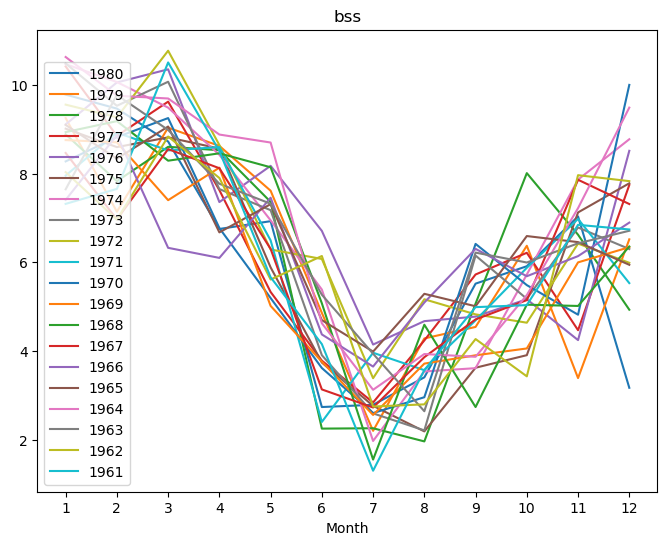

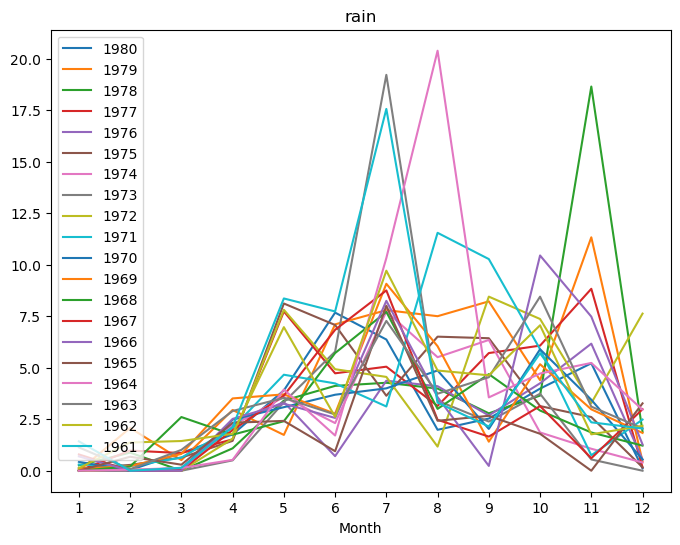

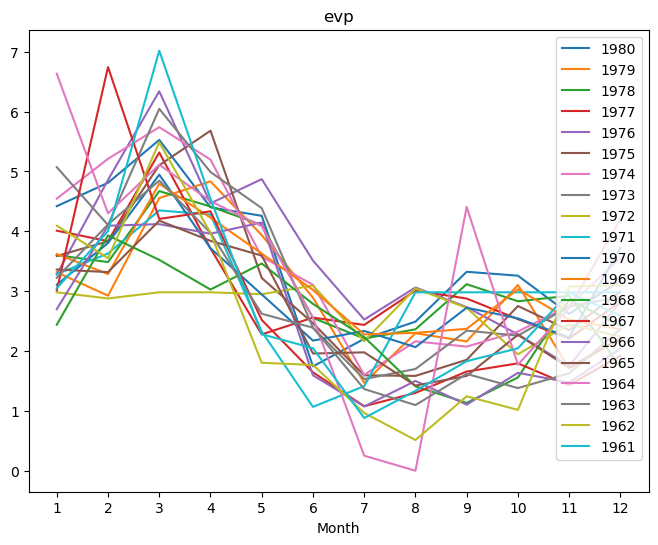

In [25]:
# a single chart for all the years and their month wise data for each column mean of each month

for column in data_frame.columns:
    if column in ['year', 'month']:
        continue
    plt.figure(figsize=(4*2, 3*2))
    plt.xlabel('Month')
    plt.xticks(data_frame['month'].unique())
    for year in data_frame['year'].unique():
        plt.plot(data_frame[data_frame['year'] == year].groupby('month').mean()[column], label=year)
    plt.legend()
    plt.title(column)
    plt.show()